# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
# загружаем библиотеки 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

pd.set_option ('display.float_format', '{:.2f}'.format)

In [2]:
# читаем файлы датасетов и сохраняем их

df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
data_list = [df_0, df_1, df_2]
data_list_name = ['dataset_0', 'dataset_1', 'dataset_2']

for x,y in zip(data_list, data_list_name):
    print(y + ':')
    display(x.head())
    print('-------------------------------------------------')

dataset_0:


,id,f0,f1,f2,product
0,txEyH,0.71,-0.50,1.22,105.28
1,2acmU,1.33,-0.34,4.37,73.04
2,409Wp,1.02,0.15,1.42,85.27
3,iJLyR,-0.03,0.14,2.98,168.62
4,Xdl7t,1.99,0.16,4.75,154.04


-------------------------------------------------
dataset_1:


,id,f0,f1,f2,product
0,kBEdx,-15.00,-8.28,-0.01,3.18
1,62mP7,14.27,-3.48,1.00,26.95
2,vyE1P,6.26,-5.95,5.00,134.77
3,KcrkZ,-13.08,-11.51,5.00,137.95
4,AHL4O,12.70,-8.15,5.00,134.77


-------------------------------------------------
dataset_2:


,id,f0,f1,f2,product
0,fwXo0,-1.15,0.96,-0.83,27.76
1,WJtFt,0.26,0.27,-2.53,56.07
2,ovLUW,0.19,0.29,-5.59,62.87
3,q6cA6,2.24,-0.55,0.93,114.57
4,WPMUX,-0.52,1.72,5.90,149.60


-------------------------------------------------


In [4]:
for data in data_list:
    data.info()
    display(data.describe())
    print('-------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.50,0.25,2.50,92.50
std,0.87,0.50,3.25,44.29
min,-1.41,-0.85,-12.09,0.00
25%,-0.07,-0.20,0.29,56.50
50%,0.50,0.25,2.52,91.85
75%,1.07,0.70,4.72,128.56
max,2.36,1.34,16.00,185.36


-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,1.14,-4.80,2.49,68.83
std,8.97,5.12,1.70,45.94
min,-31.61,-26.36,-0.02,0.00
25%,-6.30,-8.27,1.00,26.95
50%,1.15,-4.81,2.01,57.09
75%,8.62,-1.33,4.00,107.81
max,29.42,18.73,5.02,137.95


-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.00,-0.00,2.50,95.00
std,1.73,1.73,3.47,44.75
min,-8.76,-7.08,-11.97,0.00
25%,-1.16,-1.17,0.13,59.45
50%,0.01,-0.01,2.48,94.93
75%,1.16,1.16,4.86,130.60
max,7.24,7.84,16.74,190.03


-------------------------------------------------


Имеется 3 датасета размером 4 столбца на 100000 ненулевых значений. Пропуски в датасетах отсутствуют.

Проверим на дубликаты:

In [5]:
for data , data_name in zip(data_list , data_list_name) :
    print('Количество явных дубликатов в ' + data_name + ':', data.duplicated().sum())

Количество явных дубликатов в dataset_0: 0
Количество явных дубликатов в dataset_1: 0
Количество явных дубликатов в dataset_2: 0


Явные дубликаты в датасетах отсутствуют. Проверяем каждый из датасетов отдельно по наличию дубликатов в столбцах:

In [6]:
for data, data_name in zip(data_list, data_list_name):
    print(data_name + ':')
    for i in data.columns:
        print(F'Количество дубликатов в столбце {i} = {data[i].duplicated().sum()}')
    print('-------------------------------------------------')

dataset_0:
Количество дубликатов в столбце id = 10
Количество дубликатов в столбце f0 = 0
Количество дубликатов в столбце f1 = 0
Количество дубликатов в столбце f2 = 0
Количество дубликатов в столбце product = 0
-------------------------------------------------
dataset_1:
Количество дубликатов в столбце id = 4
Количество дубликатов в столбце f0 = 0
Количество дубликатов в столбце f1 = 0
Количество дубликатов в столбце f2 = 0
Количество дубликатов в столбце product = 99988
-------------------------------------------------
dataset_2:
Количество дубликатов в столбце id = 4
Количество дубликатов в столбце f0 = 0
Количество дубликатов в столбце f1 = 0
Количество дубликатов в столбце f2 = 0
Количество дубликатов в столбце product = 0
-------------------------------------------------


Столбец `id` содержит дубликаты в каждом из имеющихся датасетов. Впрочем, строки entries, содержащие дубликаты по столбцу `id`, не являются явными дубликатами в размерах всего датасета. Следовательно, данные строки можно и не удалять. Причина дубликатов неизвестна, вместе с тем, их количество в общих объемах данных незначительно.

Столбец `id` не имеет значения для построения ML-модели. Удалим его.

In [7]:
for data, data_name in zip(data_list, data_list_name):
    data.drop ('id', axis = 1, inplace = True)
    data.info()
    display (data.head())
    print('-------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


,f0,f1,f2,product
0,0.71,-0.50,1.22,105.28
1,1.33,-0.34,4.37,73.04
2,1.02,0.15,1.42,85.27
3,-0.03,0.14,2.98,168.62
4,1.99,0.16,4.75,154.04


-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


,f0,f1,f2,product
0,-15.00,-8.28,-0.01,3.18
1,14.27,-3.48,1.00,26.95
2,6.26,-5.95,5.00,134.77
3,-13.08,-11.51,5.00,137.95
4,12.70,-8.15,5.00,134.77


-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


,f0,f1,f2,product
0,-1.15,0.96,-0.83,27.76
1,0.26,0.27,-2.53,56.07
2,0.19,0.29,-5.59,62.87
3,2.24,-0.55,0.93,114.57
4,-0.52,1.72,5.90,149.60


-------------------------------------------------


Посмотрим на корреляцию значений между столбцами в датасетах.

In [8]:
for data , data_name in zip(data_list , data_list_name) : 
    print(data_name + ':')
    display(data.corr())

dataset_0:


,f0,f1,f2,product
f0,1.00,-0.44,-0.00,0.14
f1,-0.44,1.00,0.00,-0.19
f2,-0.00,0.00,1.00,0.48
product,0.14,-0.19,0.48,1.00


dataset_1:


,f0,f1,f2,product
f0,1.00,0.18,-0.00,-0.03
f1,0.18,1.00,-0.00,-0.01
f2,-0.00,-0.00,1.00,1.00
product,-0.03,-0.01,1.00,1.00


dataset_2:


,f0,f1,f2,product
f0,1.00,0.00,-0.00,-0.00
f1,0.00,1.00,0.00,-0.00
f2,-0.00,0.00,1.00,0.45
product,-0.00,-0.00,0.45,1.00


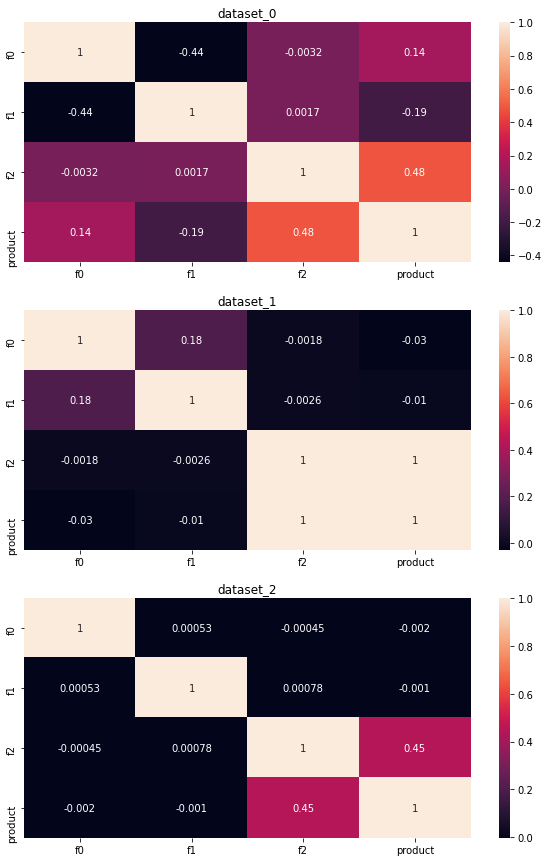

In [9]:
fig = plt.figure(figsize = (10,15))
for data, data_name, i in zip(data_list, data_list_name, range(3)):
    plt.subplot(3, 1, i+1)
    sns.heatmap(data.corr(), annot=True)
    plt.title(data_name)

**Вывод**

По результатам проведенного анализа корреляции значений между различными столбцами в датасетах может быть сделан предварительный вывод о наличии особо тесной взаимосвязи между значимым признаком `f2` и столбцом `product`. Кроме того, налицо прямая корреляция между признаком `f2` и столбцом `product` в dataset_1. Предварительная подготовка данных завершена, переходим к обучению и проверке ML-модели.

## Обучение и проверка модели

In [10]:
#  формируем признаки по каждому из датасетов

features_0 = df_0.drop(['product'], axis = 1)
features_1 = df_1.drop(['product'], axis = 1)
features_2 = df_2.drop(['product'], axis = 1)

#  формируем целевые признаки по каждому из датасетов
target_0 = df_0['product']
target_1 = df_1['product']
target_2 = df_2['product']

In [11]:
# разбиваем каждые из признаков, целевых признаков на тренировочную (0.75) и валидационную (0.25) выборки 

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size = 0.25, random_state = 12345)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size = 0.25, random_state = 12345)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size = 0.25, random_state = 12345)

In [12]:
# посмотрим полученные выборки, изучим их размер

features_list = [features_train_0, features_train_1, features_train_2, 
                       features_valid_0, features_valid_1, features_valid_2]
features_name_list = ['features_train_0', 'features_train_1', 'features_train_2', 
                       'features_valid_0', 'features_valid_1', 'features_valid_2']


for x, y in zip(features_list, features_name_list):
    print(y + ':')
    display(pd.DataFrame(x).describe())
    print('-------------------------------------------------')

features_train_0:


,f0,f1,f2
count,75000.00,75000.00,75000.00
mean,0.50,0.25,2.51
std,0.87,0.50,3.25
min,-1.41,-0.85,-10.14
25%,-0.08,-0.20,0.30
50%,0.50,0.25,2.52
75%,1.07,0.70,4.73
max,2.36,1.34,16.00


-------------------------------------------------
features_train_1:


,f0,f1,f2
count,75000.00,75000.00,75000.00
mean,1.14,-4.79,2.50
std,8.97,5.13,1.70
min,-31.61,-26.36,-0.02
25%,-6.29,-8.26,1.00
50%,1.16,-4.80,2.01
75%,8.63,-1.32,4.00
max,29.42,18.73,5.02


-------------------------------------------------
features_train_2:


,f0,f1,f2
count,75000.00,75000.00,75000.00
mean,0.00,-0.01,2.50
std,1.73,1.73,3.47
min,-8.76,-7.08,-11.97
25%,-1.16,-1.18,0.14
50%,0.01,-0.01,2.48
75%,1.16,1.16,4.86
max,7.24,7.84,16.74


-------------------------------------------------
features_valid_0:


,f0,f1,f2
count,25000.00,25000.00,25000.00
mean,0.51,0.25,2.49
std,0.87,0.51,3.24
min,-1.30,-0.81,-12.09
25%,-0.06,-0.20,0.26
50%,0.51,0.25,2.51
75%,1.08,0.70,4.69
max,2.30,1.33,15.01


-------------------------------------------------
features_valid_1:


,f0,f1,f2
count,25000.00,25000.00,25000.00
mean,1.15,-4.81,2.49
std,8.97,5.10,1.71
min,-24.74,-25.29,-0.02
25%,-6.33,-8.29,1.00
50%,1.15,-4.85,2.01
75%,8.60,-1.36,4.00
max,26.54,16.74,5.02


-------------------------------------------------
features_valid_2:


,f0,f1,f2
count,25000.00,25000.00,25000.00
mean,-0.01,0.01,2.49
std,1.73,1.73,3.48
min,-7.19,-6.75,-11.15
25%,-1.17,-1.16,0.11
50%,0.00,0.00,2.50
75%,1.16,1.16,4.85
max,6.25,6.82,14.92


-------------------------------------------------


Поскольку для обучения модели подходит только `Linear Regression`, предлагаем применить инструмент `StandardScaler` - он позволит нам провести обработку данных, "стандартизовав" их до практически нулевого среднего значения и стандартного отклонения равного 1.

In [13]:
# создаем функцию для Standard Scaler

def scaler(features_valid, features_train):
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    return features_valid, features_train

In [14]:
# применяем созданную функцию на валидационные и тренировочные выборки

features_train_0, features_valid_0 = scaler (features_train_0, features_valid_0)
features_train_1, features_valid_1 = scaler (features_train_1, features_valid_1)
features_train_2, features_valid_2 = scaler (features_train_2, features_valid_2)

In [15]:
# убедимся в работе Scaler на наши выборки

features_list = [features_train_0, features_train_1, features_train_2, 
                       features_valid_0, features_valid_1, features_valid_2]
features_name_list = ['features_train_0', 'features_train_1', 'features_train_2', 
                       'features_valid_0', 'features_valid_1', 'features_valid_2']


for x, y in zip(features_list, features_name_list):
    print(y + ':')
    display(pd.DataFrame(x).describe())

features_train_0:


,0,1,2
count,75000.00,75000.00,75000.00
mean,-0.01,-0.00,0.00
std,1.00,1.00,1.00
min,-2.20,-2.17,-3.89
25%,-0.67,-0.89,-0.68
50%,-0.01,-0.00,0.01
75%,0.64,0.89,0.69
max,2.13,2.16,4.17


features_train_1:


,0,1,2
count,75000.00,75000.00,75000.00
mean,-0.00,0.00,0.00
std,1.00,1.01,1.00
min,-3.65,-4.23,-1.47
25%,-0.83,-0.68,-0.87
50%,0.00,0.00,-0.28
75%,0.83,0.68,0.88
max,3.15,4.62,1.48


features_train_2:


,0,1,2
count,75000.00,75000.00,75000.00
mean,0.01,-0.01,0.00
std,1.00,1.00,1.00
min,-5.05,-4.10,-4.16
25%,-0.67,-0.69,-0.67
50%,0.01,-0.01,-0.00
75%,0.67,0.67,0.68
max,4.18,4.54,4.10


features_valid_0:


,0,1,2
count,25000.00,25000.00,25000.00
mean,-0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-2.08,-2.09,-4.49
25%,-0.66,-0.90,-0.69
50%,0.00,0.00,0.00
75%,0.66,0.89,0.68
max,2.05,2.14,3.86


features_valid_1:


,0,1,2
count,25000.00,25000.00,25000.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-2.89,-4.02,-1.47
25%,-0.83,-0.68,-0.87
50%,0.00,-0.01,-0.28
75%,0.83,0.68,0.88
max,2.83,4.23,1.48


features_valid_2:


,0,1,2
count,25000.00,25000.00,25000.00
mean,0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-4.15,-3.91,-3.92
25%,-0.67,-0.68,-0.68
50%,0.00,-0.00,0.00
75%,0.67,0.67,0.68
max,3.61,3.95,3.58


In [16]:
# создаем функцию
def model_pred(features_train , features_valid, target_train, target_valid) :
    model = LinearRegression() # модель линейной регрессии
    model.fit(features_train, target_train) # ставим модель на тренировочные данные
    predictions = model.predict(features_valid) # ставим модель на валидационные данные
    prediction_mean = predictions.mean() # создаем механизм для расчета среднего значения
    rmse = mean_squared_error(target_valid, predictions) ** 0.5 # создаем механизм для расчета RMSE
    return predictions ,prediction_mean, rmse

In [17]:
# раскидываем функцию на первый регион

predictions_0 ,prediction_mean_0, rmse_0 = model_pred(features_train_0 , features_valid_0, target_train_0, target_valid_0)

print('Средний предсказанный запас сырья по первому региону (dataset_0): {:.2f}'.format(prediction_mean_0))
print('RMSE : {:.2f}'.format(rmse_0))

Средний предсказанный запас сырья по первому региону (dataset_0): 92.59
RMSE : 37.58


In [18]:
# раскидываем функцию на второй регион

predictions_1 ,prediction_mean_1, rmse_1 = model_pred(features_train_1 , features_valid_1, target_train_1, target_valid_1)

print('Средний предсказанный запас сырья по второму региону (dataset_1): {:.2f}'.format(prediction_mean_1))
print('RMSE : {:.2f}'.format(rmse_1))

Средний предсказанный запас сырья по второму региону (dataset_1): 68.73
RMSE : 0.89


In [19]:
# раскидываем функцию на третий регион

predictions_2 ,prediction_mean_2, rmse_2 = model_pred(features_train_2 , features_valid_2, target_train_2, target_valid_2)

print('Средний предсказанный запас сырья по третьему региону (dataset_2): {:.2f}'.format(prediction_mean_2))
print('RMSE : {:.2f}'.format(rmse_2))

Средний предсказанный запас сырья по третьему региону (dataset_2): 94.97
RMSE : 40.03


Создадим новые датасеты, которые будут содержать информацию о реальном значении сырья и о результате работы ML-модели

In [20]:
df_0 = pd.concat ([target_valid_0.reset_index(drop=True), pd.Series(predictions_0)], axis = 1)
df_0.rename(columns = {0: 'predictions'}, inplace = True)

df_1 = pd.concat ([target_valid_1.reset_index(drop=True), pd.Series(predictions_1)], axis = 1)
df_1.rename(columns = {0: 'predictions'}, inplace = True)

df_2 = pd.concat ([target_valid_2.reset_index(drop=True), pd.Series(predictions_2)], axis = 1)
df_2.rename(columns = {0: 'predictions'}, inplace = True)

**Вывод**

По результатам обучения модели Logistic Regression и проведения оценки качества их работы на основании показателя RMSE могут быть сделаны следующие выводы:

- Регион 1 и Регион 3 обладает наибольшими средними предсказанными запасами сырья.
- Вместе с тем, Регион 2 имеет наименьшее значение RMSE - модель наиболее хорошо предсказывает вероятности именно по данному датасету. Кроме того, в связи с выявленной прямой корреляцией между признаком `f2` и столбцом `product` в dataset_1, имеется предположение, что именно данный регион может быть предложен в качестве лучшего для разработки скважин. 

Перейдем к расчету прибыли.

## Подготовка к расчёту прибыли

Сохраняем ключевые константы и осуществляем базовые расчеты:

In [21]:
# общее количество скважин
WELLS_TOTAL = 500

# количество лучших скважин
WELLS_BEST = 200

# бюджет на разработку скважин в регионе
BUDGET_TOTAL = 10_000_000_000

# сколько приносит 1 баррель сырья 
INCOME_PER_BARREL = 450_000

# бюджет на разработку 1 лучшей скважины в регионе
WELL_BEST_BUDGET = BUDGET_TOTAL / WELLS_BEST

# минимальное производство 1 лучшей скважины в регионе
MIN_PROD = WELL_BEST_BUDGET / INCOME_PER_BARREL

# минимальное производство в регионе
MIN_INCOME_REGION = WELLS_BEST * MIN_PROD

print('Бюджет на разработку 1 лучшей скважины в регионе: {:.0f} рублей'.format(WELL_BEST_BUDGET))
print('Исчисляемое производство 1 лучшей скважины в регионе: {:.2f}'.format (MIN_PROD), 'тысяч баррелей')
print('Исчисляемое производство в регионе : {:.2f}'.format(MIN_INCOME_REGION), 'тысяч баррелей')

Бюджет на разработку 1 лучшей скважины в регионе: 50000000 рублей
Исчисляемое производство 1 лучшей скважины в регионе: 111.11 тысяч баррелей
Исчисляемое производство в регионе : 22222.22 тысяч баррелей


**Вывод**

Константы сохранены, основные расчеты на основании сохраненных констант выполнены. Перейдем к расчету прибыли и рисков.

## Расчёт прибыли и рисков 

In [22]:
# создаем функцию для расчета прибыли

def revenue (df):
    df = df.sort_values(by = 'predictions', ascending = False) # функция отсортирует значения по столбцу predictions 
    df = df.iloc[0:WELLS_BEST, 0] # заберет требуемое количество лучших скважин
    value = df.sum() * INCOME_PER_BARREL - BUDGET_TOTAL # и расчитает значение прибыли
    return value

In [23]:
# создаем функцию для bootstrap

def bootstrap (df):
    values = []
    state = np.random.RandomState(12345)
    for i in range (1000):
        subsample = df.sample (n=WELLS_TOTAL, replace = True, random_state = state) # в качестве n берем искомое значение скважин
        values.append(revenue(subsample))
    return pd.Series (values)

In [24]:
# применяем функцию bootstrap на датасеты

d0 = bootstrap(df_0)
d1 = bootstrap(df_1)
d2 = bootstrap(df_2)

In [25]:
d_list = [d0, d1, d2]
d_list_name = ['регионе 1', 'регионе 2', 'регионе 3']

for x, y in zip (d_list, d_list_name):
    print('-------------------------------------------------')
    print(f'Средняя прибыль в {y} = {int(x.mean())}')
    print(f'Вероятность убытков в {y} = {(x<0).mean()}')
    print(f'95% доверительный интервал в {y} = {x.quantile(0.025), x.quantile(0.975)}')

-------------------------------------------------
Средняя прибыль в регионе 1 = 396164984
Вероятность убытков в регионе 1 = 0.069
95% доверительный интервал в регионе 1 = (-111215545.89049526, 909766941.5534226)
-------------------------------------------------
Средняя прибыль в регионе 2 = 456045105
Вероятность убытков в регионе 2 = 0.015
95% доверительный интервал в регионе 2 = (33820509.39898363, 852289453.866036)
-------------------------------------------------
Средняя прибыль в регионе 3 = 404403866
Вероятность убытков в регионе 3 = 0.076
95% доверительный интервал в регионе 3 = (-163350413.39560106, 950359574.9237995)


**Вывод**

К выбору предлагается `Регион 2` (dataset 1) как Регион, имеющий наименьшую вероятность убытков (0.015 по сравнению с вероятностью 0.069 в Регионе 1 и 0.076 в Регионе 3), а также как Регион, имеющий наибольшую среднюю прибыль (456 045 105 по сравнению с 396 164 984 в Регионе 1 и 404 403 866 в Регионе 3).

Вместе с тем, следует отдельно отметить, что `Регион 2` имеет наименьшее количество запасов по сравнению с другими представленными регионами. Это необходимо учитывать, поскольку в случае увеличения качества и объема данных по всем регионам, может быть произведена корректировка предсказаний модели.